In [1]:
import sys

sys.path.append("./../../src")

from Dataset import SpeechCommandsDataset
from torch.utils.data import DataLoader, SubsetRandomSampler, Subset
from Transformer import SpeechCommandTransformer, train_transformer, calculate_class_weights, plot_confusion_matrix, plot_accuracy_loss, set_seed
import torch
from torch.optim import AdamW
import torch.nn as nn
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
torch.cuda.empty_cache()
set_seed(213)

In [4]:
train_dataset = SpeechCommandsDataset("../../data/train", mode="modified")
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=6)

test_dataset = SpeechCommandsDataset("../../data/test", mode="modified")
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=6)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class_weights = calculate_class_weights(train_dataset)
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

In [7]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2).to(device)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion)

Epoch [1/20], Train Loss: 2.5115, Train Accuracy: 16.03, Test Accuracy: 3.57%


Epoch [2/20], Train Loss: 2.4919, Train Accuracy: 31.67, Test Accuracy: 3.87%


Epoch [3/20], Train Loss: 2.4902, Train Accuracy: 37.33, Test Accuracy: 60.71%


Epoch [4/20], Train Loss: 2.4873, Train Accuracy: 51.95, Test Accuracy: 60.71%


Epoch [5/20], Train Loss: 2.4861, Train Accuracy: 53.68, Test Accuracy: 60.71%


Epoch [6/20], Train Loss: 2.4859, Train Accuracy: 54.37, Test Accuracy: 60.71%
Early stopping at epoch 6
Best Test Accuracy: 60.71%, Best Train Accuracy: 37.33%


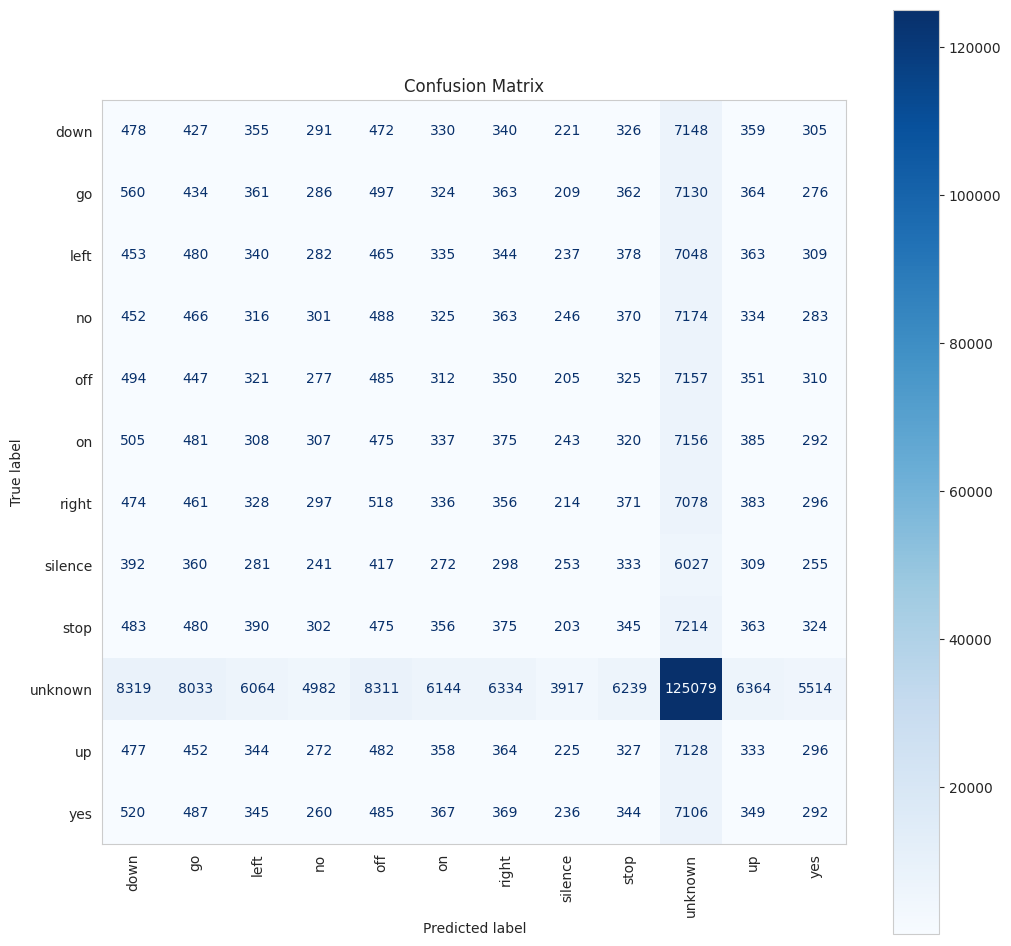

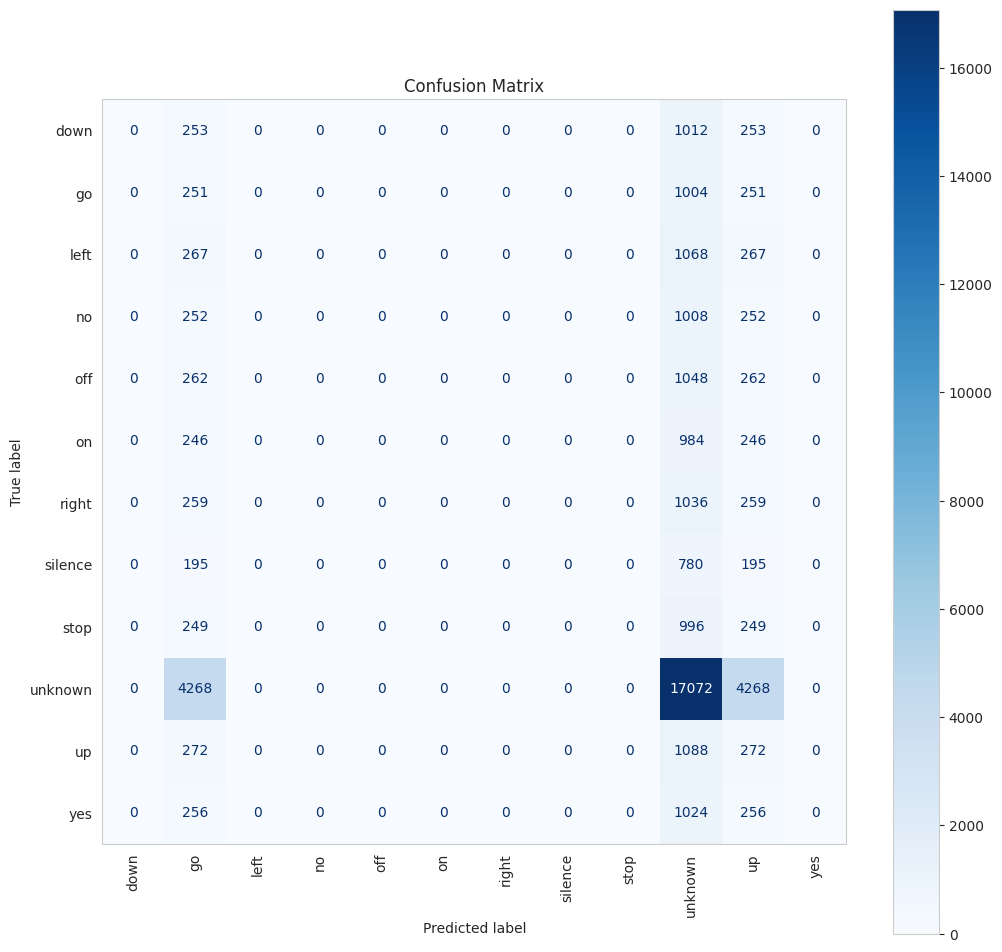

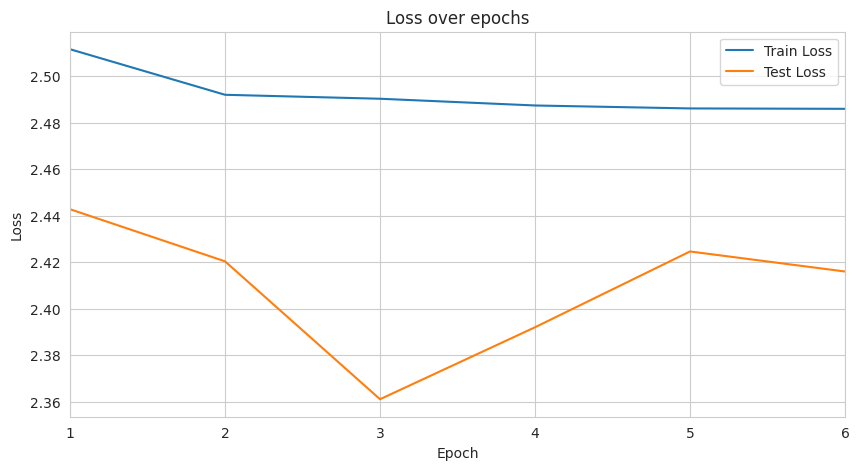

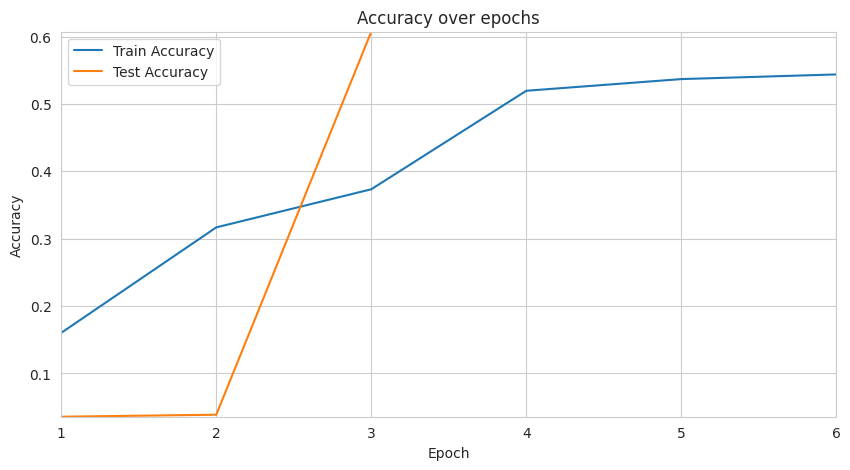

In [8]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=False)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=False)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [9]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=2).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion, optimizer=optimizer)

Epoch [1/20], Train Loss: 1.8435, Train Accuracy: 20.32, Test Accuracy: 28.82%


Epoch [2/20], Train Loss: 1.1333, Train Accuracy: 36.53, Test Accuracy: 45.21%


Epoch [3/20], Train Loss: 0.8846, Train Accuracy: 47.48, Test Accuracy: 60.94%


Epoch [4/20], Train Loss: 0.7311, Train Accuracy: 55.42, Test Accuracy: 56.73%


Epoch [5/20], Train Loss: 0.6245, Train Accuracy: 60.89, Test Accuracy: 63.21%


Epoch [6/20], Train Loss: 0.5674, Train Accuracy: 65.27, Test Accuracy: 63.43%


Epoch [7/20], Train Loss: 0.5110, Train Accuracy: 68.00, Test Accuracy: 72.30%


Epoch [8/20], Train Loss: 0.4666, Train Accuracy: 70.94, Test Accuracy: 71.48%


Epoch [9/20], Train Loss: 0.4214, Train Accuracy: 73.48, Test Accuracy: 69.45%


Epoch [10/20], Train Loss: 0.3913, Train Accuracy: 75.24, Test Accuracy: 73.47%


Epoch [11/20], Train Loss: 0.2704, Train Accuracy: 81.33, Test Accuracy: 81.78%


Epoch [12/20], Train Loss: 0.2512, Train Accuracy: 82.51, Test Accuracy: 80.43%


Epoch [13/20], Train Loss: 0.2450, Train Accuracy: 83.10, Test Accuracy: 81.22%


Epoch [14/20], Train Loss: 0.2356, Train Accuracy: 83.34, Test Accuracy: 80.17%


Epoch [15/20], Train Loss: 0.2275, Train Accuracy: 83.90, Test Accuracy: 81.38%


Epoch [16/20], Train Loss: 0.2274, Train Accuracy: 83.97, Test Accuracy: 82.02%


Epoch [17/20], Train Loss: 0.2157, Train Accuracy: 84.32, Test Accuracy: 82.93%


Epoch [18/20], Train Loss: 0.2121, Train Accuracy: 84.58, Test Accuracy: 82.35%


Epoch [19/20], Train Loss: 0.2056, Train Accuracy: 84.86, Test Accuracy: 82.69%


Epoch [20/20], Train Loss: 0.2034, Train Accuracy: 85.23, Test Accuracy: 83.04%
Best Test Accuracy: 83.04%, Best Train Accuracy: 85.23%


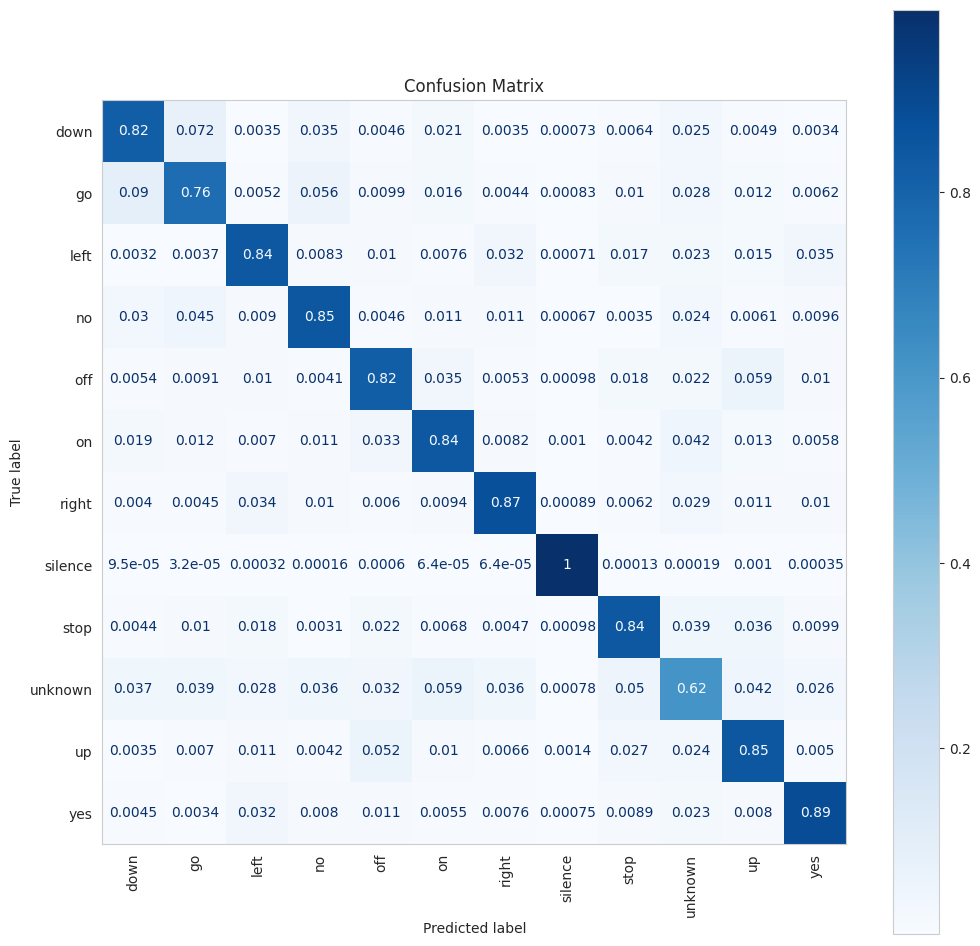

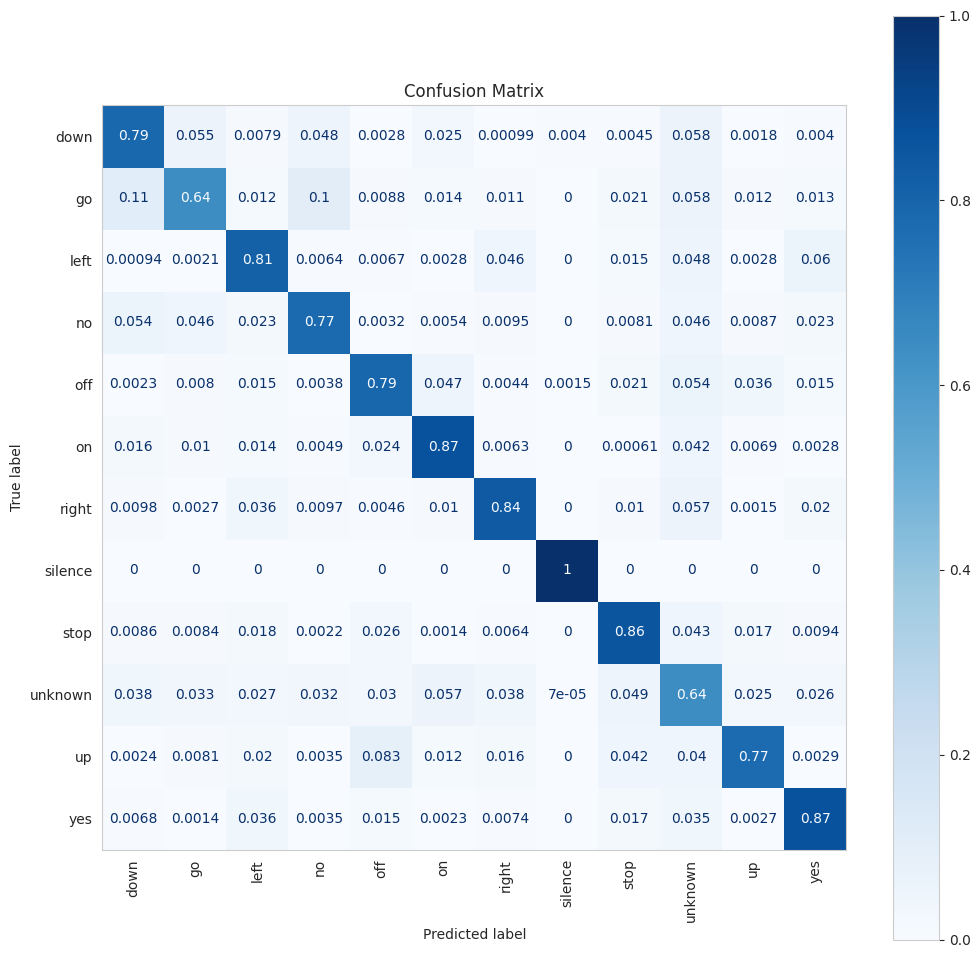

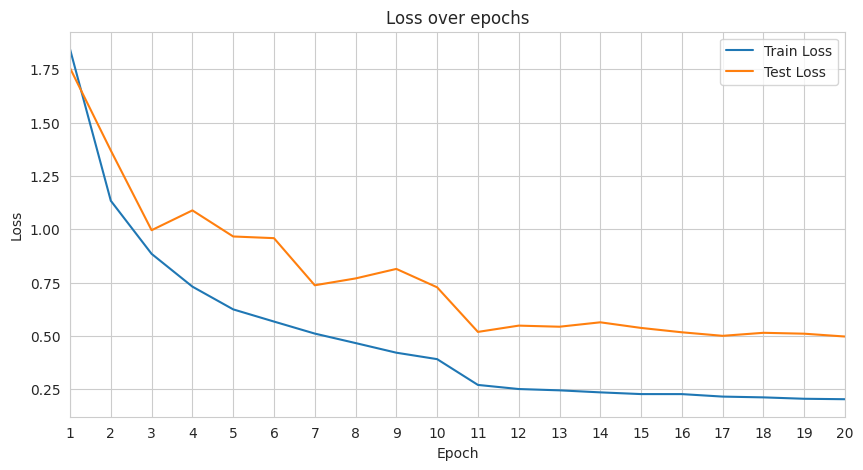

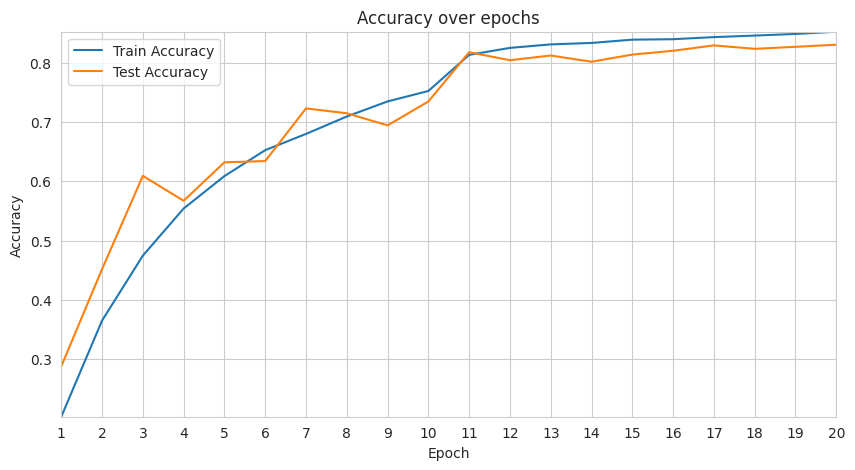

In [12]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=True)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=True)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [13]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=1).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion, optimizer=optimizer, scheduling=False)

OutOfMemoryError: CUDA out of memory. Tried to allocate 102.00 MiB. GPU 0 has a total capacity of 3.93 GiB of which 62.56 MiB is free. Process 31439 has 592.00 MiB memory in use. Process 42302 has 564.00 MiB memory in use. Process 63032 has 416.00 MiB memory in use. Including non-PyTorch memory, this process has 2.06 GiB memory in use. Of the allocated memory 1.92 GiB is allocated by PyTorch, and 64.50 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=False)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=False)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)

In [ ]:
model = SpeechCommandTransformer(num_classes=len(train_dataset.class_to_idx), embed_dim=256, device=device,
                                 stride=1, pos_embedding=True).to(device)
optimizer = AdamW(model.parameters(), lr=0.00005, weight_decay=0.001)

(train_losses, train_accuracies, test_losses, test_accuracies, train_true_labels, train_pred_labels,
     test_true_labels, test_pred_labels) = train_transformer(train_loader, test_loader, model=model, num_epochs=20, device=device, criterion=criterion, optimizer=optimizer)

In [ ]:
plot_confusion_matrix(train_true_labels, train_pred_labels, train_dataset, normalize=False)
plot_confusion_matrix(test_true_labels, test_pred_labels, train_dataset, normalize=False)
plot_accuracy_loss(train_accuracies, train_losses, test_accuracies, test_losses)